<a href="https://colab.research.google.com/github/isaacbull/Data-Science-zikspot/blob/main/data_science_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iris Dataset Analysis: Clustering and Classification
This notebook explores the Iris dataset using machine learning techniques for clustering and classification. We will:

**1. Examine the dataset's structure and class distribution.**

**2. Reduce dimensionality with PCA for visualization and model improvement.**

**3. Apply K-Means clustering to group similar data points, optimizing cluster number with the Elbow Method and Silhouette Analysis.**

**4. Utilize a Naive Bayes classifier to predict Iris species and evaluate its performance using accuracy, precision, recall, and F1-score.**

**5. Visualize model results using a confusion matrix and ROC curves to gain further insights.**


We will employ Python libraries like Pandas, Scikit-learn, Matplotlib, and Seaborn for data analysis, model training, and visualization. This notebook aims to demonstrate the application of machine learning techniques for understanding and predicting Iris species based on their features.




Using value_counts to check for class imbalance...

target
0    50
1    50
2    50
Name: count, dtype: int64


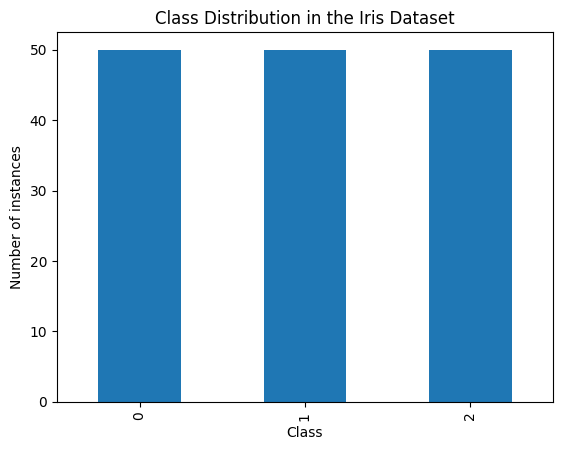

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Check class distribution
class_counts = df['target'].value_counts()
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class Distribution in the Iris Dataset')
plt.show()

In [2]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X_pca[0,1]

0.31939724658508517

PCA Model for Iris Dataset


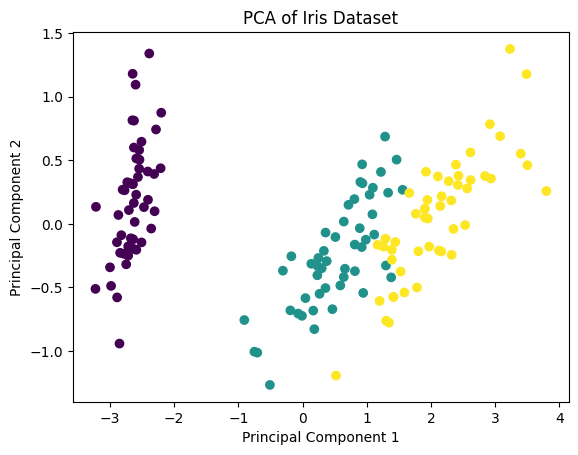

In [3]:


from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load data
data = load_iris()
X = data.data

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


metrics that evaluates our PCA model

In [15]:

import numpy as np

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Total Explained Variance: {np.sum(explained_variance_ratio)}")

# Singular values
singular_values = pca.singular_values_
print(f"Singular Values: {singular_values}")

Explained Variance Ratio: [0.92461872 0.05306648]
Total Explained Variance: 0.9776852063187977
Singular Values: [25.09996044  6.01314738]


naive bayes model for iris data

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9777777777777777


compute other metrics calculation for our naive bayes. confusion matrix, precision, recall and f1score


In [18]:


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score



# Compute and print other metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

precision = precision_score(y_test, y_pred, average='weighted') # Use weighted for multi-class
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred, average='weighted') # Use weighted for multi-class
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted for multi-class
print(f'F1 Score: {f1}')

Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1 Score: 0.9777448559670782


### Plot confusion matrix, roc, auc

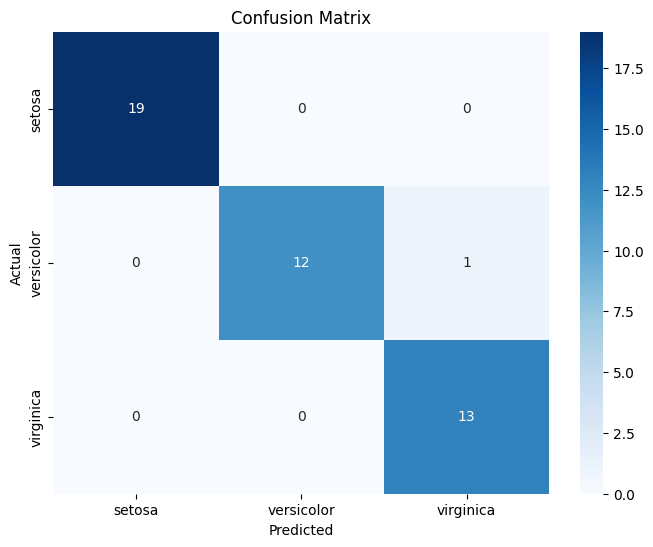

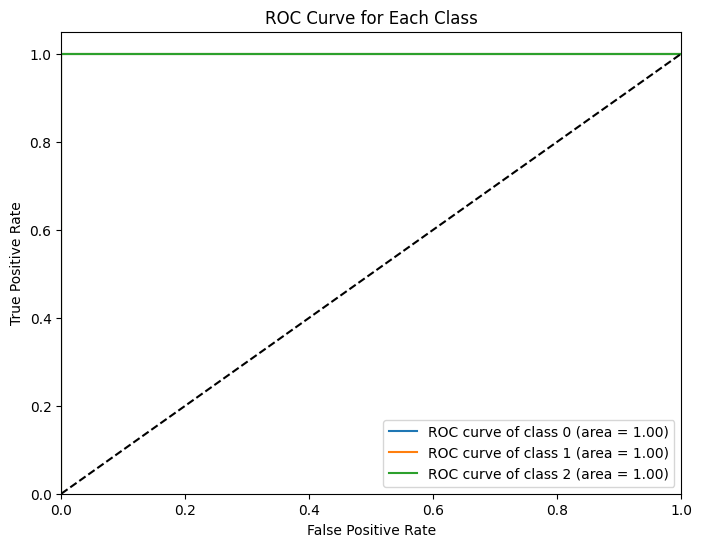

Micro-average AUC: 0.9997530864197531


In [19]:
# prompt: plot confusion matrix, roc, auc

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming y_test and y_pred are already defined from your previous code

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# ROC Curve and AUC (for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) # Binarize the output
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], nb.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), nb.predict_proba(X_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

# Print micro average AUC
print(f"Micro-average AUC: {roc_auc['micro']}")

In [20]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

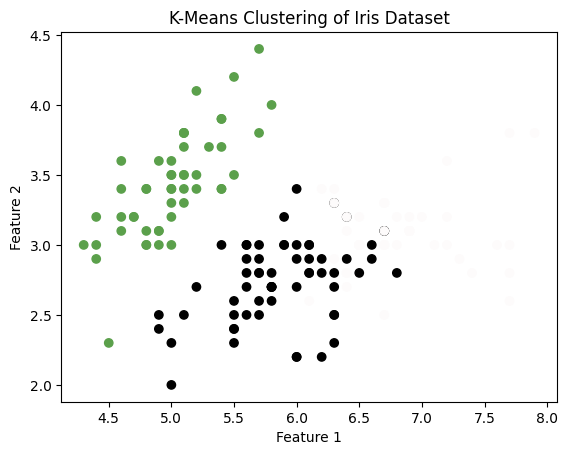

In [25]:
from sklearn.cluster import KMeans

# Load data
X = load_iris().data

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot K-Means result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='gist_earth_r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()



### Evaluating Kmeans models.

The silhouette score function is a way to evaluate the quality of clusters created by a clustering algorithm, in this case, K-Means.

A higher silhouette_score indicates better clustering, meaning that data points are well-matched to their assigned clusters and distinct from other clusters.
The score ranges from -1 to 1:
1: Ideal clustering, where clusters are well-separated and dense.
0: Clusters are overlapping or poorly defined.
-1: Data points may have been assigned to the wrong clusters.



### The Elbow Method:

The Elbow Method helps determine the best value for k (the number of clusters) when you're not sure what number to use. It aims to find a balance between having enough clusters to capture the structure in your data but not having so many that it becomes overly complex or meaningless.

A lower WCSS generally indicates better clustering, as data points are closer to their cluster centers.


Silhouette Score: 0.551191604619592


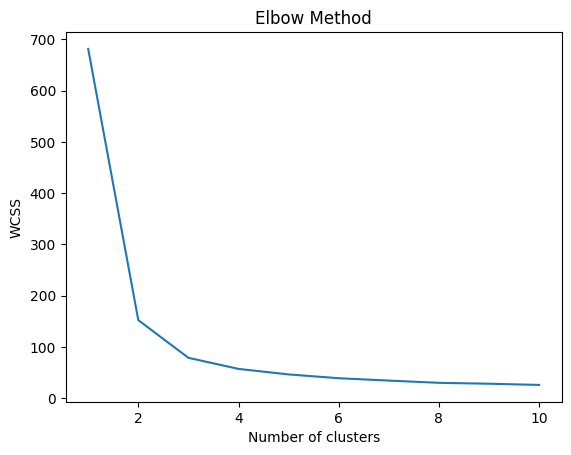

In [26]:
# Evaluate KMeans Model
from sklearn.metrics import silhouette_score

# Silhouette Analysis
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Elbow Method for optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


from the plot we can see that 3 clusters is perfect for our model.

So we have our improved KMeans Model
having determined our optimal k from the elbow method ( k=3)

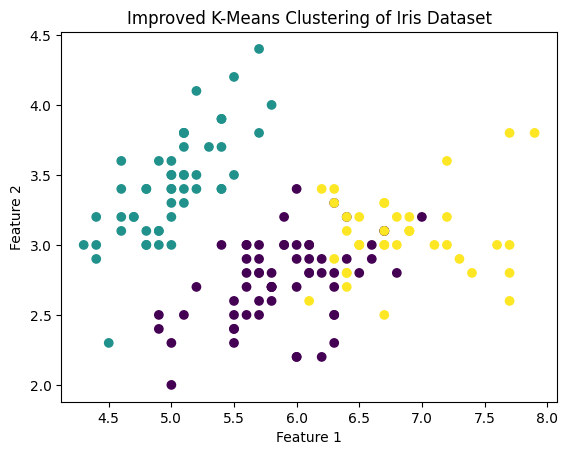

Improved Silhouette Score: 0.5528190123564095


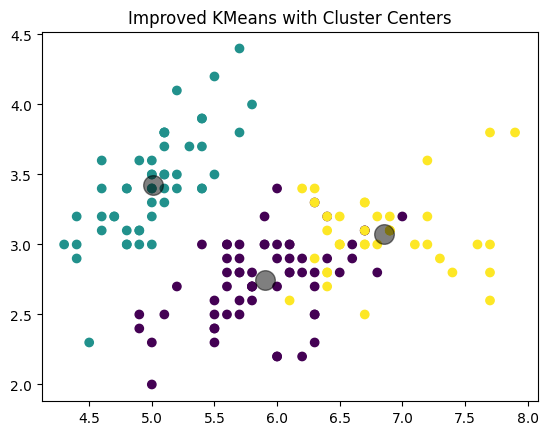

In [27]:


optimal_k = 3  # Replace with the actual optimal k from the elbow method plot
kmeans_improved = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Increased n_init for better convergence
y_kmeans_improved = kmeans_improved.fit_predict(X)

# Plot Improved K-Means result
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_improved, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Improved K-Means Clustering of Iris Dataset')
plt.show()

# Evaluate the improved model
silhouette_avg_improved = silhouette_score(X, y_kmeans_improved)
print(f"Improved Silhouette Score: {silhouette_avg_improved}")

# Visualize cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_improved, cmap='viridis')
centers = kmeans_improved.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Improved KMeans with Cluster Centers')
plt.show()